# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [2]:
# Q1 (code)
!pip install tomotopy
!pip install little_mallet_wrapper

import tomotopy as tp
import little_mallet_wrapper as lmw


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 36.7 MB/s eta 0:00:00


## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [3]:
# Q2 (code)
import pandas as pd

# load dataset
sanders_tweets = pd.read_csv('/content/sanders_tweets.csv')
trump_tweets = pd.read_csv('/content/trump_tweets.csv')

# combine dateset
combined_tweets = pd.concat([sanders_tweets, trump_tweets], ignore_index=True)


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [45]:
# Q3 (code)
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Ensure  nltk's stop words are downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# load dataset
sanders_tweets = pd.read_csv('/content/sanders_tweets.csv')
trump_tweets = pd.read_csv('/content/trump_tweets.csv')

# combine dateset
combined_tweets = pd.concat([sanders_tweets, trump_tweets], ignore_index=True)

# Create a function to clean individual CSV tweets
def clean_tweet(tweet):
    # Step1 : convert all tweet to lower case
     tweet = tweet.lower()
    # Step2: remove URLs, user mentions, and specific Twitter username because those will impact the analysis after this
     tweet = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', tweet, flags=re.MULTILINE)  # use Tips here
    # Step3: tokenization and removing stopwords, punctuation, and numbers, same reason as above, we dont need this.
     stop_words = set(stopwords.words('english'))
     punctuation_andnumbers = set(string.punctuation).union(set(string.digits))
     word_tokens = word_tokenize(tweet)
     filtered_tweet = [w for w in word_tokens if not w in stop_words and not w in punctuation_andnumbers]
     return ' '.join(filtered_tweet)

combined_tweets['processed_text'] = combined_tweets['Content'].apply(clean_tweet)


# Tip: add the following line to remove URLS and user mentions
# processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [18]:
# Q4 (code)
import pandas as pd
import re
import tomotopy as tp
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk



# Create model instance of LDA and set up the topic's number  (k=10)
model = tp.LDAModel(k=10, alpha=0.1, eta=0.01, min_cf=5)

# Add processed text to LDA model
for text in combined_tweets['processed_text']:
    model.add_doc(text.split())

# Train the model
for i in range(0, 100, 10):
    model.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, model.ll_per_word))

# View the topics in the model
for i in range(model.k):
    words = model.get_topic_words(i, top_n=10)
    print('Topic #{}: {}'.format(i, words))

trained_model = model


Iteration: 0	Log-likelihood: -8.743990371141177
Iteration: 10	Log-likelihood: -8.383547553518634
Iteration: 20	Log-likelihood: -8.209501915068673
Iteration: 30	Log-likelihood: -8.12162691984448
Iteration: 40	Log-likelihood: -8.065130569801934
Iteration: 50	Log-likelihood: -8.024236903651195
Iteration: 60	Log-likelihood: -8.001266993740478
Iteration: 70	Log-likelihood: -7.9827605268484945
Iteration: 80	Log-likelihood: -7.969230373041165
Iteration: 90	Log-likelihood: -7.960425565148265
Topic #0: [('great', 0.058647509664297104), ('thank', 0.024884914979338646), ('amp', 0.012531125918030739), ('vote', 0.012420428916811943), ('big', 0.011866943910717964), ('state', 0.011534852907061577), ('job', 0.010450021363794804), ('strong', 0.009985093958675861), ('total', 0.009874396957457066), ('military', 0.00974156055599451)]
Topic #1: [('tax', 0.02059898152947426), ('jobs', 0.01816479302942753), ('workers', 0.01414608396589756), ("'s", 0.012033391743898392), ('economy', 0.011872642673552036), ('b

### Q5. Print out the top words for each topic and manually evaluate their coherence


In [6]:
# Q5a (code)

# Print out the top words for each topic
for i in range(trained_model.k):
    topic_words = trained_model.get_topic_words(i, top_n=10)
    print(f'Topic {i}:')
    print(', '.join([word for word, prob in topic_words]))


Topic 0:
rt, trump, president, 's, today, house, amp, white, live, ’
Topic 1:
’, “, ”, rt, trump, fbi, amp, russia, collusion, witch
Topic 2:
united, china, states, u.s., trade, ...., deal, great, amp, president
Topic 3:
great, thank, amp, state, vote, total, military, endorsement, job, maga
Topic 4:
’, rt, biden, democrats, ”, “, president, impeachment, joe, trump
Topic 5:
”, “, ’, news, fake, media, amp, like, trump, people
Topic 6:
workers, million, year, 's, jobs, pay, billion, drug, paid, americans
Topic 7:
rt, america, american, president, people, today, ’, country, day, great
Topic 8:
people, must, health, care, 's, trump, tax, need, n't, americans
Topic 9:
’, amp, border, country, great, democrats, get, big, wall, people


In [7]:
# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?
#Topic 0: This topic seems to be related to legal or political directives, possibly American law or governance, as indicated by words like "law," "american," "country," "united."


#Topic 1: Likely focuses on electoral activities or campaign support, given terms like "vote," "endorsement," "maga," which is associated with Donald Trump's campaign slogan(or sander's lol).


#Topic 2: May be about political parties and figures, with references to "democrats," "biden," "trump," and possibly impeachment proceedings or debates, given the word “impeachment.”


#Topic 3: Could represent discussions about the economy, with words like “jobs,” “economy,” and possibly historical economic events, as suggested by “history,” “record.”


#Topic 4: Seems to deal with international relations ,trade or trump's view especially regarding China as suggested by “border,” ‘china,’ ‘trade.’


#Topic 5: Likely concerns health care policy, given the presence of “health care,” and broader social change or societal issues, suggested by ‘change.’


#Topic 6: Appears to reflect discourse on media and information potentially indicating discussions about media bias or misinformation as indicated by ‘news,’ ‘fake media,’ ‘russia.’


#Topic 7: This topic seems to focus on political leadership and diplomacy as seen with ‘president,’ ‘white house,’ and international


#Topic 8: May involve discussions on economic policy, taxation, and public health, given words like "tax," "workers," "billion," "drug."


#Topic 9: Seems to be a mix of the previous topic.A lot of words have come up before，so  maybe referring to political rallying or campaigning.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [19]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5371033070981501 
Per Topic: [0.6115282773971558, 0.6152218312025071, 0.5113162908703088, 0.5344996511936188, 0.6349108040332794, 0.5660269796848297, 0.4540392071008682, 0.3782786414027214, 0.5311290234327316, 0.5340823646634817]



In [15]:
##retrain the model using 8 topic

model = tp.LDAModel(k=8, alpha=0.1, eta=0.01, min_cf=5) # change the k from 10 to 8

for text in combined_tweets['processed_text']:
    model.add_doc(text.split())

for i in range(0, 100, 10):
    model.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, model.ll_per_word))
for i in range(model.k):
    words = model.get_topic_words(i, top_n=10)
    print('Topic #{}: {}'.format(i, words))

trained_model = model

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

Iteration: 0	Log-likelihood: -8.643917978775006
Iteration: 10	Log-likelihood: -8.297194473282378
Iteration: 20	Log-likelihood: -8.127232232957056
Iteration: 30	Log-likelihood: -8.050967211943684
Iteration: 40	Log-likelihood: -8.005186371296476
Iteration: 50	Log-likelihood: -7.977890463465414
Iteration: 60	Log-likelihood: -7.957749506064425
Iteration: 70	Log-likelihood: -7.941507916617801
Iteration: 80	Log-likelihood: -7.925980885044662
Iteration: 90	Log-likelihood: -7.9147585509113085
Topic #0: [('rt', 0.04772414267063141), ("'s", 0.010542402043938637), ('amp', 0.010121555998921394), ('’', 0.009532371535897255), ('president', 0.009532371535897255), ('trump', 0.008922144770622253), ('court', 0.008816933259367943), ('live', 0.00742814177647233), ('must', 0.007238761056214571), ('people', 0.007007295731455088)]
Topic #1: [('must', 0.018972327932715416), ('people', 0.01691249944269657), ('border', 0.015850061550736427), ('country', 0.011621990241110325), ('wall', 0.011144977062940598), ('c

In [17]:
##retrain the model using 12 topic


model = tp.LDAModel(k=12, alpha=0.1, eta=0.01, min_cf=5) # change the k from 10 to 12


for text in combined_tweets['processed_text']:
    model.add_doc(text.split())

for i in range(0, 100, 10):
    model.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, model.ll_per_word))
for i in range(model.k):
    words = model.get_topic_words(i, top_n=10)
    print('Topic #{}: {}'.format(i, words))

trained_model = model

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

Iteration: 0	Log-likelihood: -8.796473777652096
Iteration: 10	Log-likelihood: -8.376023711525638
Iteration: 20	Log-likelihood: -8.205594337229476
Iteration: 30	Log-likelihood: -8.120613429135856
Iteration: 40	Log-likelihood: -8.066307492714621
Iteration: 50	Log-likelihood: -8.023531177839573
Iteration: 60	Log-likelihood: -7.993001302019621
Iteration: 70	Log-likelihood: -7.971307386546106
Iteration: 80	Log-likelihood: -7.956644849309576
Iteration: 90	Log-likelihood: -7.945952500159435
Topic #0: [('’', 0.036713410168886185), ('democrats', 0.03195247799158096), ('rt', 0.01995198428630829), ('border', 0.01786600984632969), ('impeachment', 0.014896562322974205), ('want', 0.01312961895018816), ('”', 0.01224614679813385), ('“', 0.011927115730941296), ('nothing', 0.010945480316877365), ('amp', 0.010258335620164871)]
Topic #1: [('rt', 0.09661316126585007), ('president', 0.03530425205826759), ('trump', 0.03475914150476456), ("'s", 0.014557980932295322), ('’', 0.013756347820162773), ('white', 0.0

### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

In [ ]:
# Q6 (words)
#The model was initially trained with 8,10,12 topics.
#The coherence score for the model, using the 'c_v' metric, was 0.5159,0.5358 and 0.5477 on average.
#So we can get the result that when the numbers of topic increased, the average coherence score will also slightly increase
#Also based on Q4's answer. The log-likelihood values, which measure the model's fit to the data, improved over iterations, indicating that the model was learning and better fitting the data.
#This is a good sign, as increasing log-likelihood values typically suggest a model that is converging and thus improving in capturing the structure of the dataset.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

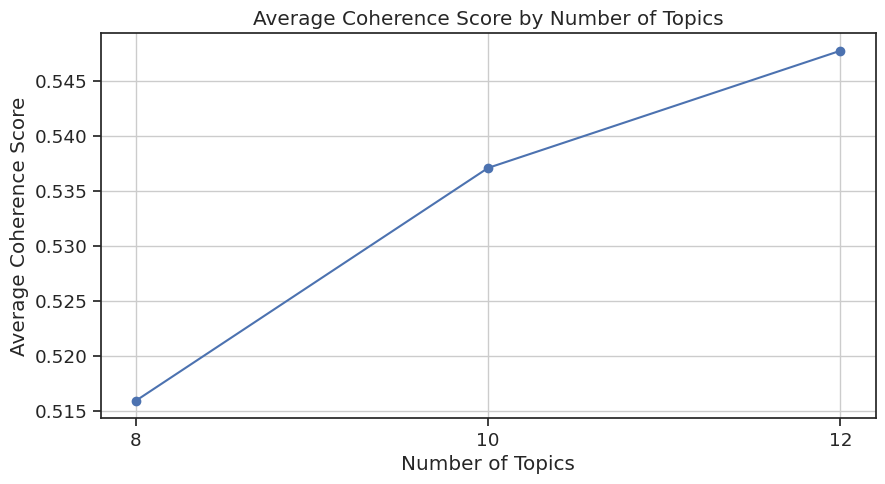

In [46]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
import matplotlib.pyplot as plt

# Given data
number_of_topics = [8,10,12]  # As per tips, this is X
average_coherence_scores = [0.5159629544941708  ,   0.5371033070981501 , 0.547739227861166  ]  # As per tips, this is Y

# Function to plot the average coherence for models with different number of topics.
def plot(number_of_topics, average_coherence_scores):
    plt.figure(figsize=(10, 5))
    plt.plot(number_of_topics, average_coherence_scores, marker='o', linestyle='-', color='b')
    plt.title('Average Coherence Score by Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence Score')
    plt.xticks(number_of_topics)
    plt.grid(True)
    plt.show()

# Plot the diagram
plot(number_of_topics, average_coherence_scores)


### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [48]:
# Q7a (code)

import pandas as pd


#Calculate the topic distribution for each document in the model
#To get the topic distribution in Tomotopy, we use the get_topic_dist method
topic_distributions = [doc.get_topic_dist() for doc in model.docs]

#Convert to DataFrame
df_topicdistributions = pd.DataFrame(topic_distributions)
combined_tweets['dominant_topic'] = df_topicdistributions.idxmax(axis=1)
combined_tweets['dominant_topic_probability'] = df_topicdistributions.max(axis=1)


top_documents_per_topic = {}
for topic in range(2, 6):  # Adjust the range according to the topics of interest
    top_documents = combined_tweets[combined_tweets['dominant_topic'] == topic].nlargest(5, 'dominant_topic_probability')
    top_documents_per_topic[topic] = top_documents

#Now print the result to check
print(top_documents_per_topic)


{2:                Username              TweetId  \
11482  @realDonaldTrump  1023538682849107968   
21698  @realDonaldTrump  1228438881969885184   
11900  @realDonaldTrump  1035233203609657344   
21789  @realDonaldTrump  1229866940912398336   
19074  @realDonaldTrump  1191694243762524161   

                                      Title  \
11482  @realDonaldTrump_1023538682849107968   
21698  @realDonaldTrump_1228438881969885184   
11900  @realDonaldTrump_1035233203609657344   
21789  @realDonaldTrump_1229866940912398336   
19074  @realDonaldTrump_1191694243762524161   

                                                 Content  \
11482   RT @realDonaldTrump: Congressman David Kustof...   
21698   . @ MoInTheHouse Brooks is running for Congre...   
11900   Kevin Stitt ran a great winning campaign agai...   
21789   Chris Jacobs will be a great Congressman who ...   
19074   RT @realDonaldTrump: Great Republican Geary H...   

                                          processed_text  domin

Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

In [ ]:
# Q7b (words)
#Topic 2 is based on the fact that all first tweets come from @realDonaldTrump, which implies that this subject has some Trump’s themes or content.

#There are several terms associated with international relations like “North Korea” and references to Trump’s state visits. This indicates a focus on Trump’s foreign policy or diplomatic efforts.

#Tweets from @SenSanders dominate these topics. It is clear that these topics may be about issues central to Bernie Sanders’ policy discussions or campaign rhetoric.

#For instance, words like “Green New Deal,” “car makers,” and “health care” are suggestions of environmental policy matters, corporate responsibility, and healthcare reform that are often addressed by Sanders.

#In topic five politicians tweets have been mixed but data given shows only for @realDonaldTrump and can hint at what both politicians may have talked about

##Though the data provided gives an impression that both politicians have addressed it, the top tweets belong to Trump, possibly due to higher engagement or specific events related to the timing of the tweet.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [ ]:
# Crete a sample of tweets

from random import sample


#combined_tweets is my DataFrame that contains the tweet data

#Sample 100 rows from the DataFrame without replacement
sampled_tweets = combined_tweets.sample(n=100, random_state=1)


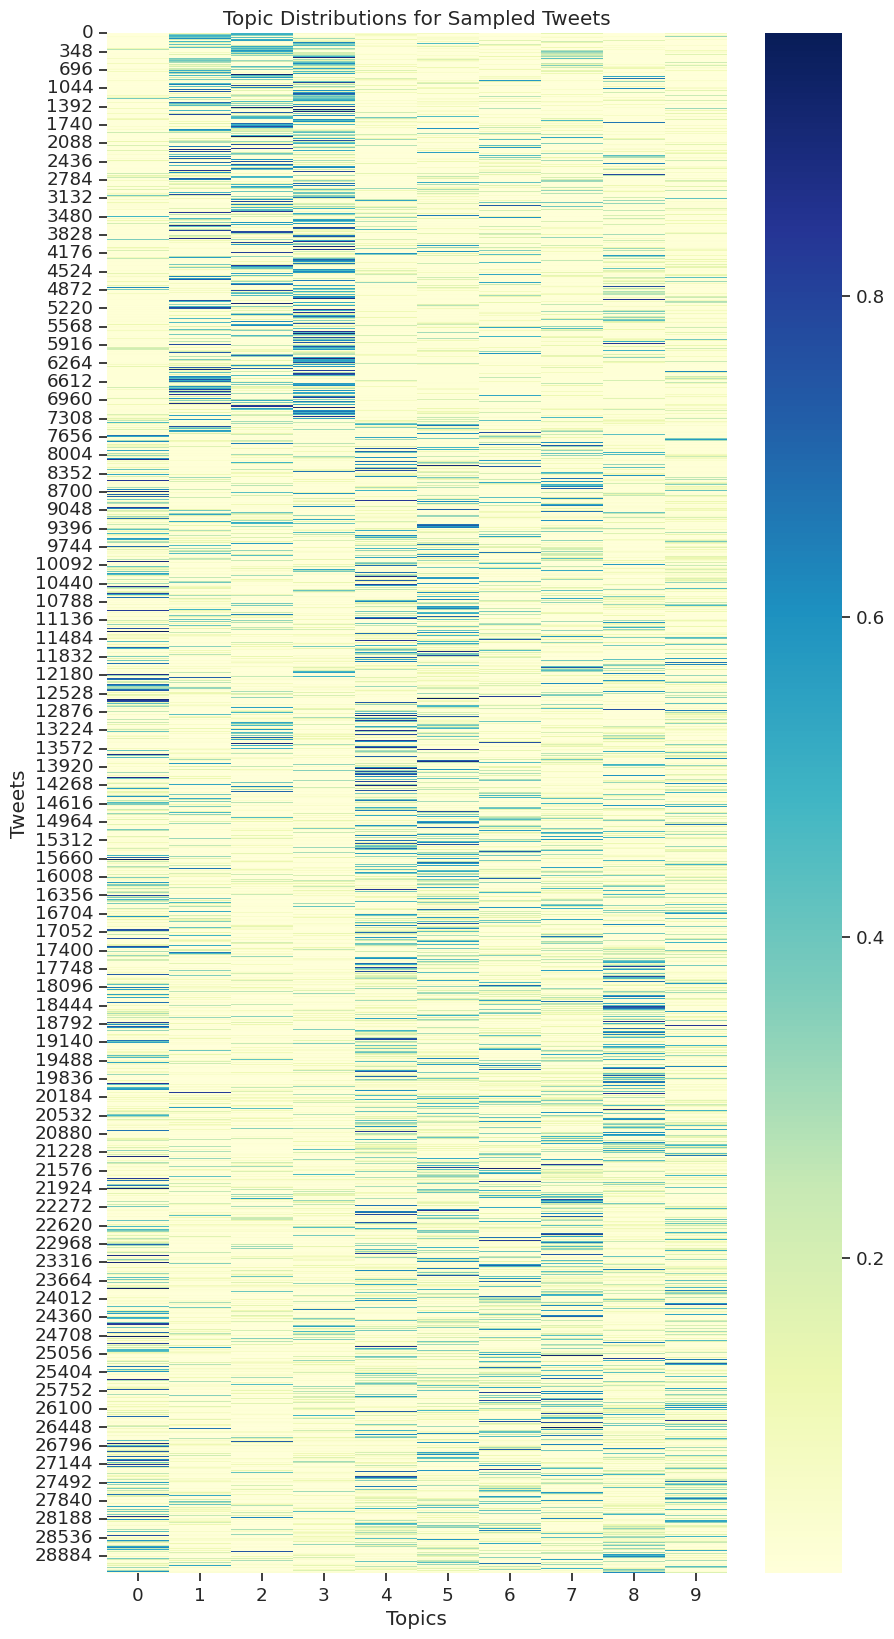

In [31]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()
import pandas as pd
from random import sample
import seaborn as sns
import matplotlib.pyplot as plt

topicdistributions = [doc.get_topic_dist() for doc in model.docs]
df_topicdistributions = pd.DataFrame(data=topic_distributions)

#plot the heatmap
plt.figure(figsize=(10, 20))  # Adjust the size as necessary to fit the number of tweets
sns.heatmap(df_topicdistributions, cmap='YlGnBu', cbar=True, square=False)
plt.title('Topic Distributions for Sampled Tweets')
plt.xlabel('Topics')
plt.ylabel('Tweets')
plt.show()


### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

In [ ]:
# Q9 (words)
#Consistency Across Topics: All the topics have some degree of representation across the tweets. No single topic completely dominates or is absent, which suggests a varied discussion within the tweets sampled.

#Distinct Topics for Each Politician:  the heatmap is split with one politician's tweets in the top half and the other's in the bottom half,
#it seems that certain topics have more pronounced representation in one half versus the other.
#For example, topics represented by columns 3 and 8 appear more frequently in the top half, which could suggest these topics are more associated with the politician whose tweets are represented there.
#In the mean time,Topics 3, 4, and 8 show high variation within the tweet distributions,
#show that these topic are discussed unevenly among the tweets, which could imply specialized discussion or certain tweets focusing heavily on these topics

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [23]:
# X2 (code)
import pandas as pd


#Filter the DataFrame for 50 tweets by Trump
trump_tweets = combined_tweets[combined_tweets['Username'] == '@realDonaldTrump'].sample(n=50, random_state=1)

#Filter the DataFrame for 50 tweets of Sanders
sanders_tweets = combined_tweets[combined_tweets['Username'] == 'SenSanders'].sample(n=50, random_state=1)

#Combine them
balanced_sample = pd.concat([trump_tweets, sanders_tweets])



### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

<ipython-input-50-68bb16528e84>:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_topicdistribution = df_topicdistribution.groupby('label').mean()


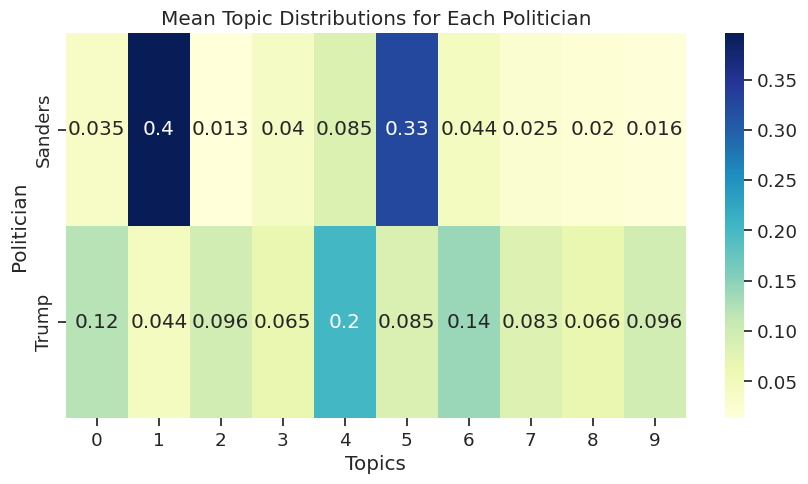

In [50]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)
import pandas as pd
import tomotopy as tp
import seaborn as sns
import matplotlib.pyplot as plt

#Load two CSV files
sanders_tweets = pd.read_csv('/content/sanders_tweets.csv')
trump_tweets = pd.read_csv('/content/trump_tweets.csv')

#Add labels to distinguish between tweets from different politicians
sanders_tweets['label'] = 'Sanders'
trump_tweets['label'] = 'Trump'

#Merge the two DataFrames into one
all_tweets = pd.concat([sanders_tweets, trump_tweets])

#Save the combined DataFrame to a new CSV file
all_tweets.to_csv('/content/combined_tweets.csv', index=False)

#Create an LDA model using Tomotopy with a specified number of topics (e.g., k=10)
model = tp.LDAModel(k=10)

#Add documents to the model, using only the tweet text
for tweet in all_tweets['Content']:
    model.add_doc(tweet.split())

#Train the model
for i in range(200):
    model.train()

#Extract the topic distribution for each document
topicdistribution = [doc.get_topic_dist() for doc in model.docs]

#Create a new DataFrame to store the topic distributions for each tweet
df_topicdistribution = pd.DataFrame(topic_distributions)

#Add the original tweets and their labels to the topic distributions DataFrame
df_topicdistribution['original_text'] = all_tweets['Content'].values
df_topicdistribution['label'] = all_tweets['label'].values


#Plot a heatmap
mean_topicdistribution = df_topicdistribution.groupby('label').mean()

plt.figure(figsize=(10, 5))
sns.heatmap(mean_topicdistribution, cmap='YlGnBu', annot=True)
plt.title('Mean Topic Distributions for Each Politician')
plt.xlabel('Topics')
plt.ylabel('Politician')
plt.show()

